<a href="https://colab.research.google.com/github/nisanitachi/myml/blob/main/ecg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/sample_data/iot_dataset.csv')

In [ ]:
df.head()

,Sl.No,Temperature Data,ECG Data,Pressure Data,Target
0,1,32,0,77,1
1,2,32,0,77,1
2,3,32,16,77,1
3,4,32,0,77,1
4,5,32,18,77,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Sl.No             150 non-null    int64
 1   Temperature Data  150 non-null    int64
 2   ECG Data          150 non-null    int64
 3   Pressure Data     150 non-null    int64
 4   Target            150 non-null    int64
dtypes: int64(5)
memory usage: 6.0 KB


In [ ]:
df['Target'].value_counts()

,count
Target,
0,59
1,56
2,35


In [ ]:
pc=pd.array(data=["LOW","MEDIUM","HIGH"],dtype=str)

In [ ]:
df['Patient_Condition']=df.Target.apply(lambda x:pc[x])

In [ ]:
df.head(20)

,Sl.No,Temperature Data,ECG Data,Pressure Data,Target,Patient_Condition
0,1,32,0,77,1,MEDIUM
1,2,32,0,77,1,MEDIUM
2,3,32,16,77,1,MEDIUM
3,4,32,0,77,1,MEDIUM
4,5,32,18,77,1,MEDIUM
5,6,32,0,77,1,MEDIUM
6,7,32,0,77,0,LOW
7,8,32,23,77,0,LOW
8,9,32,0,77,0,LOW
9,10,32,0,77,1,MEDIUM


### ***VISUALISING***

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

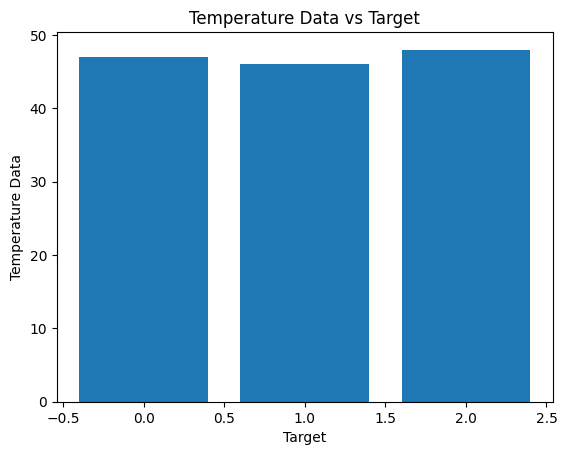

In [ ]:
plt.bar(df['Target'],df['Temperature Data'])
plt.xlabel('Target')
plt.ylabel('Temperature Data')
plt.title('Temperature Data vs Target')
plt.show()

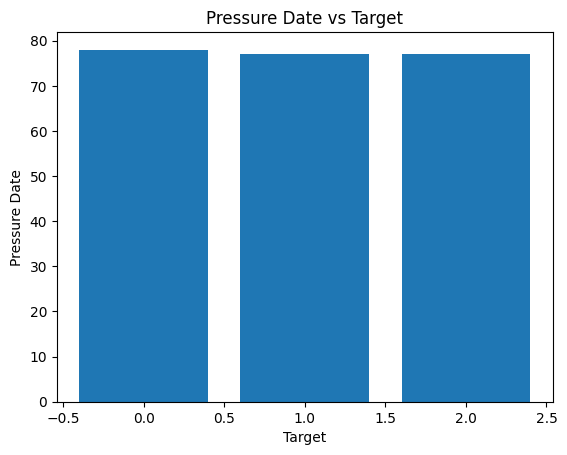

In [ ]:
plt.bar(df['Target'],df['Pressure Data'])
plt.xlabel('Target')
plt.ylabel('Pressure Date')
plt.title('Pressure Date vs Target')
plt.show()

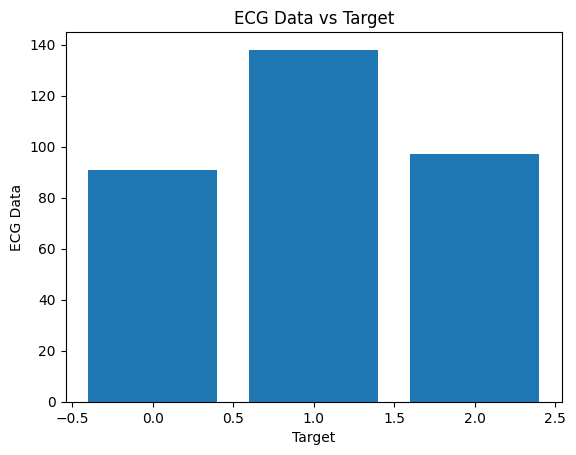

In [ ]:
plt.bar(df['Target'],df['ECG Data'])
plt.xlabel('Target')
plt.ylabel('ECG Data')
plt.title('ECG Data vs Target')
plt.show()

# ***MODEL CREATION***

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop(['Target','Patient_Condition'],axis=1)
X

,Sl.No,Temperature Data,ECG Data,Pressure Data
0,1,32,0,77
1,2,32,0,77
2,3,32,16,77
3,4,32,0,77
4,5,32,18,77
...,...,...,...,...
145,146,32,0,77
146,147,32,0,77
147,148,32,0,77
148,149,32,0,77


In [ ]:
y=df['Target']
y

,Target
0,1
1,1
2,1
3,1
4,1
...,...
145,2
146,2
147,1
148,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape

(120, 4)

In [ ]:
X_test.shape

(30, 4)

***KNN MODEL***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
ac_knn=knn.score(X_test,y_test)
ac_knn


0.5

In [ ]:
knn_2 = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_2.score(X_test,y_test)

0.4

***SVM MODEL***

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(X_train,y_train)

SVC()

In [ ]:
ac_svm=model.score(X_test,y_test)
ac_svm

0.6

In [ ]:
model_c = SVC(C=5)

In [ ]:
model_c.fit(X_train,y_train)

SVC(C=5)

In [ ]:
model_c.score(X_test,y_test)

0.5666666666666667

In [ ]:
model_k = SVC(kernel='linear')

In [ ]:
model_k.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
model_k.score(X_test,y_test)

0.36666666666666664

In [ ]:
model_g=SVC(gamma=0.02)

In [ ]:
model_g.fit(X_train,y_train)

SVC(gamma=0.02)

In [ ]:
model_g.score(X_test,y_test)

0.4666666666666667

# ***COMPARISON BETWEEN KNN ANS SVM***